## 2:Random Sample Imputation
Aim: It consists of taking random observation from the dataset and we use this observation to replace the NAN values

When shoud it be used?
It assumes that the data are missing completely at random (MCAR)

In [1]:
import pandas as pd
df = pd.read_csv('Datasets/titanic_train.csv', usecols= ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
df['Age'].isnull().sum()

177

In [13]:
df['Age'].dropna().sample(df['Age'].isnull().sum())

273    37.0
542    11.0
234    24.0
767    30.5
883    28.0
       ... 
115    21.0
144    18.0
372    19.0
320    22.0
770    24.0
Name: Age, Length: 177, dtype: float64

In [17]:
def impute_nan(df,variable, median):
    df[variable+'_median']= df[variable].fillna(median)
    df[variable+'_random']= df[variable]
    #It will have the random sample to fill the null values
    random_sample= df[variable].dropna().sample(df[variable].isnull().sum())
    #pandas need to have the same index order to merge the dataset
    random_sample.index= df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']= random_sample

In [15]:
median= df.Age.median()
median

28.0

In [20]:
impute_nan(df, 'Age', median)

In [23]:
df.mean()

Survived       0.383838
Age           29.699118
Fare          32.204208
Age_median    29.361582
Age_random    29.331279
dtype: float64

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

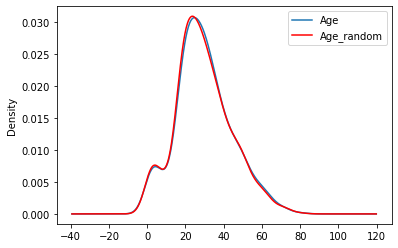

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind="kde", ax= ax)
df.Age_random.plot(kind= "kde", ax=ax, color= 'red')
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages 
1. Easy to Implement
2. There is no distortion in variance

### Disadvantages
1. In every situation randomness don't work


## 3:Capturing NaN values with a new feature
It works well if the data are not missing completely at random MNAR

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,21.0
889,1,26.0,30.0000,26.0,26.0


In [29]:
df = pd.read_csv('Datasets/titanic_train.csv', usecols= ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [31]:
import numpy as np
df['Age_NAN']= np.where(df['Age'].isnull(), 1, 0)

In [35]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [39]:
# Now the NaN records is stored in a 
# new feature and we can use it in model creation to know 
# where the missing values were inside one feature.

# Now we can fill the Nan values with mean/median

In [43]:
df.Age.fillna(df.Age.median(), inplace= True)

In [44]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### Advantages 
1. Easy to implement
2. Captures the importance of missing values

### Disadvantages 
1. Creating Additional Features(Curse of Dimensionality)

## End of Distribution Imputation
If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [45]:
df = pd.read_csv('Datasets/titanic_train.csv', usecols= ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

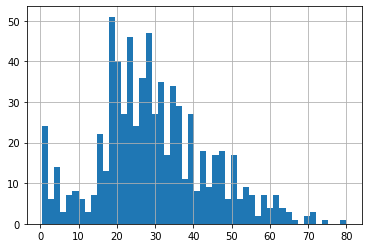

In [46]:
df.Age.hist(bins=50)

c:\users\harshvardhan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

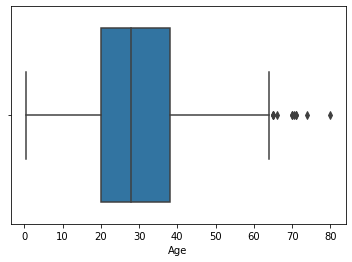

In [55]:
import seaborn as sns
sns.boxplot('Age', data= df)

In [54]:
extreme = df.Age.mean() + 3*df.Age.std()
extreme

73.27860964406094

In [64]:
def impute_nan(df, variable, median, extreme):
    df[variable+'_end_dist']= df[variable].fillna(extreme)
    df[variable].fillna(median,inplace= True)

In [65]:
impute_nan(df,'Age', df.Age.median(), extreme)

In [66]:
df.head()

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [70]:
df.isnull().sum()

Survived        0
Age             0
Fare            0
Age_end_dist    0
dtype: int64

<AxesSubplot:>

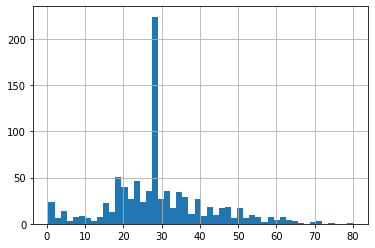

In [67]:
df['Age'].hist(bins=50)

<AxesSubplot:>

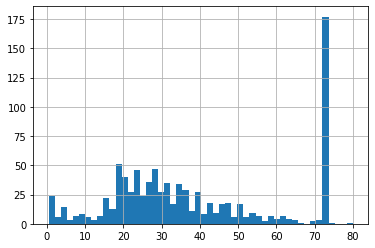

In [68]:
df['Age_end_dist'].hist(bins=50)

c:\users\harshvardhan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_dist'>

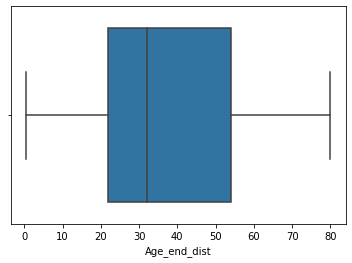

In [72]:
sns.boxplot('Age_end_dist', data=df)

### Advantages 
1. Easy to implement
2. Captures the importance of missingness if there is one

### Disadvantages 
1. Distorts the original distribution of the variable
2. If missigness is not important, it may mask the predictive power of the original variable by distorting its distribution 
3. If the number of NA is big, it will mask true outliers in the distribution
4. If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent step of  feature engineering